In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import root
import math

# R-CURVE
R-curve which is also known as fracture resistance can be used to describe the fracture in quasi-brittle materials. Energy is required for crack to propagate, this required rate of energy is called R. For quasi-brittle materials, this term is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
R-Curves can be constructed using two basic approaches for quasi-brittle materials:

1. Equivalent Elastic Crack Approach
2. Cohesive Crack Approach

## Equivalent Elastic Crack Approach
In this approach, the effective crack is assumed to be traction free. With reference to the literature for arbitrary sizes there are found to be many different ways of defining the equivalence between actual and effective elastic specimen. In the case of small frature zones, it is observed that all these equivalence merge in a single one called far field equivalence. The only problem that arises while defining the equivalence is to know the exact location of the tip of the equivalent crack i.e:
\begin{align}
\Delta a_e = a_e - a_0    \\
\end{align}
Here, $a_e$ is the equivalent crack length and $a_0$ is the initial crack length.

### Estimate of the Equivalent LEFM Crack Extension
According to LEFM, the effective crack extension can be found by:
\begin{align}
\Delta a_e = R - \frac{1}{2 \pi} \left(\frac{K_I}{f_t^´} \right)^2    \\
\end{align}

## Cohesive Crack Approach
In order to model R-Curve, a cohesive force on the tip of the crack is used in this technique.

### R-Curve as an envelope of G-Curve:
At critical crack propagation:
\begin{align}
G_c = R_c    \\
\left(\frac{\partial G}{\partial a}\right)_c = \left(\frac{\partial R}{\partial a}\right)_c
\end{align}
Here, $a$ represents the crack length. $G_c$ represents the critical strain energy release rate and $R_c$ represents the R--Curve at critical.
In case of a known geometry, the value of G depends on three independent variable i.e.:
1. specimen width (b)
2. crack length (a)
3. normalized applied load ($\sigma$) (for three point bending $\sigma = 1.5Ps/b^2$)

The total sum of stable crack extension and initial critical crack length gives ciritical crack length.

### Energy Release Rate:
\begin{align}
G = G_c + \sum_{n=1}^{\infty} \frac{1}{n!}\left(\frac{d^nG}{da^n}\right)_c(a - a_c)^n \\
\Delta a_c = a_c - a_o
\end{align}
$a_o$ initial crack length

In [2]:
G_c, a_0, a_c, a = sp.symbols('G_c, a_0, a_c, a', real=True)
G = sp.Symbol('G')
n = sp.Symbol('n', real = True)
delta_a_c = sp.Function('\Delta{a_c}')(a_c, a_0)
delta_a = sp.Function('\Delta{a}')(a, a_0)
sigma = sp.Symbol (r'\sigma', real = True)
alpha = sp.Symbol(r'\alpha', real = True)
d = sp.Symbol('d', real = True)
P = sp.Symbol('P', real = True)
b = sp.Symbol('b', real = True)
x = sp.Symbol('x', real = True)
K_I = sp.Symbol('K_I', real = True)
G_c, a_0, a_c, a

(G_c, a_0, a_c, a)

In [3]:
s = 4*b #for three point bending beam 
sigma = 1.5 * P * s / b**2
sigma 

6.0*P/b

In [4]:
#K_I = sigma * sp.sqrt(np.pi * a)
#K_I

In [5]:
## Geometry Factor
f_1 = sp.Symbol('f_1', real = True) #1.123 (Three Point bend Beam)
f_2 = sp.Symbol('f_2', real = True) #1.42 (Three Point bend Beam)
E = sp.Symbol('E', real = True)

With reference to Linear Elastic Fracture Mechanics the Strain Energy Release Rate can be written as:
\begin{align}
G = \frac{\sigma^2 \pi a {f_1}^2}{E}
\end{align}

$f_1$ is a geometry factor and its value is equal to 1.123 for the three point bend beam.

In [6]:
G = sigma**2 * np.pi * a * f_1**2 / E
G

113.097335529233*P**2*a*f_1**2/(E*b**2)

In [7]:
# G = G_c + sp.Sum( (1/sp.factorial(n))*(sp.diff(G, a, n))*(a - a_c)**n, (n,1,sp.oo))
# delta_a_c = a_c - a_0
# delta_a_c
G

113.097335529233*P**2*a*f_1**2/(E*b**2)

When $G=0$ and $a=0$

In [8]:
subs_delta_a_c = {delta_a_c: a_c - a_0}

In [9]:
#x = sp.ln(delta_a_c, 10)
#x

In [10]:
#x_1 = x.subs(subs_delta_a_c)
#x_1

In [11]:
# G_c = - sp.Sum( (1/sp.factorial(n))*(sp.diff(G, a, n))*(alpha / (alpha - 1))**n*(-delta_a_c)**n, (n,1,sp.oo))
# G_c

In [12]:
CMOD = 4*sigma*f_2 / E
COD = CMOD * sp.sqrt(alpha * a_0 - x**2)

In [13]:
K_ic = K_I
CTOD = COD
term = sp.Function('term')(E, f_1, CTOD, a_0, K_ic, f_2)
term_1 = sp.simplify(term.subs(term, np.pi * E**2 * f_1**2 * CTOD**2) /(32 * a_0 * K_ic**2 * f_2 **2))
#a_c = alpha * a_0
# def f(alpha):
#     term = sp.Function('term')(E, f_1, CTOD, a_0, K_ic, f_2)
#     term_1 = sp.simplify(term.subs(term, np.pi * E**2 * f_1**2 * CTOD**2) /(32 * a_0 * K_ic**2 * f_2 **2))
#     f_alpha = (term_1) + sp.sqrt((term_1) + 1) - alpha
#     data_dict = {E:1, f_1:1.123, a_0 : 1, x : 1, P:1, K_I :1, f_2 : 1.42, b :1}
#     alpha_solve = sp.simplify(f_alpha.subs(data_dict).doit())
#     get_alpha_solve = sp.lambdify((alpha), alpha_solve, 'numpy')
#     al = 70.31 * alpha + np.sqrt(71.31*alpha - 70.31) - 71.31
#     return[get_alpha_solve]
# get_alpha_solve
# alpha_solve

In [14]:
# data_dict = {E:1, f_1:1.123, a_0 : 1, x : 1, P:1, K_I :1, f_2 : 1.42, b :1}
# alpha_solve = sp.simplify(f_alpha.subs(data_dict).doit())
# get_alpha_solve = sp.lambdify((alpha), alpha_solve, 'numpy')
# get_alpha_solve

In [44]:
from scipy.optimize import fsolve
#from sympy.solvers import solve
#alpha = fsolve(f, [1])
f_alpha = (term_1) + sp.sqrt((term_1) + 1) - alpha
sol = sp.solve((f_alpha), (alpha))
#sol = solve(get_alpha_solve(alpha), x0)
sol[0]
sol[1]

(2.82743338823081e+27*K_I**2*P**2*a_0**2*b**2*f_1**2 - 5.65486677646163e+27*K_I**2*P**2*a_0*b**2*f_1**2*x**2 + 751988.4823893*K_I**2*b**2*sqrt(a_0**3*(1.76838825657661e+40*K_I**4*a_0*b**4 - 2.0e+42*K_I**2*P**2*a_0*b**2*f_1**2 - 1.0e+42*K_I**2*P**2*b**2*f_1**2*x**2 + 7.06858347057702e+43*P**4*a_0*f_1**4 + 5.65486677646163e+43*P**4*f_1**4*x**2)) + 3.19775182595295e+29*P**4*a_0*f_1**4*x**2)/(a_0**2*(1.0e+26*K_I**4*b**4 - 1.13097335529233e+28*K_I**2*P**2*b**2*f_1**2 + 3.19775182595295e+29*P**4*f_1**4))

$\alpha$ is the precritical stable crack growth ($\alpha \geq 1$)

In order to transform the equation for $G_c$ into a linear differential equation with constant coefficients:

In [16]:
#eq = sp.Sum((d-n+1)*(alpha/(alpha-1))**n*(-1)**n+1,(n,1,sp.oo))
#eq

In [17]:
#G_c = sp.Sum((beta[n]*delta_a_c**d[n]), (n,1, sp.oo))
#G_c

In [18]:
delta_a = a - a_0

In [19]:
d_1 = 1/2 + ((alpha - 1) / alpha) + sp.sqrt(1/4 + ((alpha - 1) / alpha) - ((alpha - 1) / alpha)**2)
d_2 = 1/2 + ((alpha - 1) / alpha) - sp.sqrt(1/4 + ((alpha - 1) / alpha) - ((alpha - 1) / alpha)**2)
d_1

sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5 + (\alpha - 1)/\alpha

In [20]:
si = 1 - ((d_2 -((alpha - 1)/alpha))/(d_1 - ((alpha - 1)/alpha))*((alpha*a_0 - a_0)/(a - a_0))**d_2-d_1) 
si

-((\alpha*a_0 - a_0)/(a - a_0))**(-sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5 + (\alpha - 1)/\alpha)*(0.5 - sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2))/(sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5) + sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 1.5 + (\alpha - 1)/\alpha

In [21]:
beta_2 = (K_ic**2 * (alpha * a_0 - a_0)**-d_2) / ( E * (1 - (d_2-((alpha - 1)/alpha))/(d_1 - ((alpha -1)/alpha))))
beta_2

K_I**2*(\alpha*a_0 - a_0)**(sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) - 0.5 - (\alpha - 1)/\alpha)/(E*(-(0.5 - sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2))/(sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5) + 1))

In [22]:
#R = sp.Sum((beta*delta_a**d), (n,1, sp.oo))
#R
R = beta_2 *si * (a - a_0)**d_2
R

K_I**2*(a - a_0)**(-sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5 + (\alpha - 1)/\alpha)*(\alpha*a_0 - a_0)**(sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) - 0.5 - (\alpha - 1)/\alpha)*(-((\alpha*a_0 - a_0)/(a - a_0))**(-sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5 + (\alpha - 1)/\alpha)*(0.5 - sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2))/(sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5) + sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 1.5 + (\alpha - 1)/\alpha)/(E*(-(0.5 - sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2))/(sqrt(0.25 + (\alpha - 1)/\alpha - (\alpha - 1)**2/\alpha**2) + 0.5) + 1))

In [23]:
material_params = {
b : 76.2,
P : 100,
E : 20000,
a_0 : 10,
f_1 : 1.123,
f_2 : 1.42,
x : 6,
K_ic : 31.4,
CTOD : 0.02

    
}

In [24]:
alpha_1 = -(sol[0].subs(material_params))
alpha_1

1.23287875498938

In [25]:
d_1_alpha = d_1.subs(alpha, alpha_1)
d_1_alpha

1.32387898283322

In [26]:
d_2_alpha = d_2.subs(alpha, alpha_1)
d_2_alpha

0.0539014826779835

In [27]:
si_alpha = si.subs(alpha, alpha_1).subs(material_params)
get_si_alpha = sp.lambdify((a), si_alpha, 'numpy')
si_alpha
#get_si_alpha

0.124478648248474*(1/(a - 10))**0.0539014826779835 + 2.32387898283322

In [28]:
beta_2_alpha = beta_2.subs(alpha, alpha_1).subs(material_params)
beta_2_alpha

0.0420955304259113

In [29]:
R_ic = (K_ic)**2 / E
R_ic

K_I**2/E

In [30]:
# get_K_I = sp.lambdify(
#     (a), K_I.subs(material_params), 'numpy'
# )
# K_I.subs(material_params)

In [31]:
get_G = sp.lambdify(
    (a), G.subs(material_params), 'numpy'
)
G.subs(material_params)

0.0122820807292115*a

In [32]:
G_general =sigma**2 * np.pi * a * (a/b)**2 / E
G_general
get_general_G = sp.lambdify((a), G_general.subs(material_params), 'numpy')
get_general_G
G_general.subs(material_params)

1.67726812023232e-6*a**3

In [33]:
get_COD = sp.lambdify(
    (a), COD.subs(material_params), 'numpy'
)
COD.subs(material_params)

0.0200000000000000

In [34]:
R.subs(alpha, alpha_1).subs(material_params)
get_R = sp.lambdify((a), R.subs(alpha, alpha_1).subs(material_params), 'numpy'
)
R.subs(alpha, alpha_1).subs(material_params)

0.0420955304259113*(a - 10)**0.0539014826779835*(0.124478648248474*(1/(a - 10))**0.0539014826779835 + 2.32387898283322)

In [35]:
# get_alpha = sp.lambdify((a), alpha.subs(material_params), 'numpy'
# ) 
# alpha.subs(material_params)

In [36]:
#beta = beta_2.subs(alpha)
# get_beta_2 = sp.lambdify((a), beta_2.subs(material_params), 'numpy'
# )
# beta_2.subs(material_params)

In [37]:
# get_d_2 = sp.lambdify((a), d_2.subs(material_params), 'numpy'
# )

In [38]:
# get_si = sp.lambdify((a), si.subs(material_params), 'numpy')
# si.subs(material_params)

In [39]:
# get_sol_alpha = sp.lambdify(sol[0].subs(material_params), 'numpy')

In [40]:
#a = alpha * a_0

In [41]:
def get_response(a_min = 7, a_max=30,n_steps=10):
    G_record, R_record, Si_record, G_general_record = [], [], [], []
    a_t = np.linspace(a_min,a_max,n_steps+1)
    
    for a_n in a_t: 
        G = get_G(a_n)
        G_general = get_general_G(a_n)
        R = get_R(a_n)
        Si = get_si_alpha(a_n)
        print(R)
        #print(Si)
        G_record.append(G)
        R_record.append(R)
        Si_record.append(Si)
        G_general_record.append(G_general)
    return (
        a_t
        ,np.array(G_record,dtype=np.float_),
        np.array(R_record,dtype=np.float_),
        np.array(Si_record,dtype=np.float_),
        np.array(G_general_record,dtype=np.float_)
    )

0.11843898605794279
0.11779794102206023
0.11708561018367304
0.11628348700702462
0.11536465471191222
0.11428771580545005
0.1129839713717181
0.11132612733912862
0.10903274919321547
0.10522642752042778
nan
[25.  23.5 22.  20.5 19.  17.5 16.  14.5 13.  11.5 10. ]
0.11843898605794279
0.11823232145275872
0.11801880138319513
0.11779794102206023
0.11756920167180039
0.11733198243175044
0.11708561018367304
0.11682932747014024
0.11656227770896856
0.11628348700702462
0.11599184158707568
[25.  24.5 24.  23.5 23.  22.5 22.  21.5 21.  20.5 20. ]
0.11843898605794279
0.11863923313500281
0.11883345961121206
0.11902202639043101
0.11920526260161843
0.11938346923748869
0.11955692228559466
0.1197258754346261
0.11989056242335908
0.12005119908751007
0.1202079851500206
[25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30. ]
0.11843898605794279
0.11902202639043101
0.11955692228559466
0.12005119908751007
0.12051073303909139
0.12094020200690223
0.12134339174687293
0.12172341000102439
0.12208283986740069
0.122423

<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


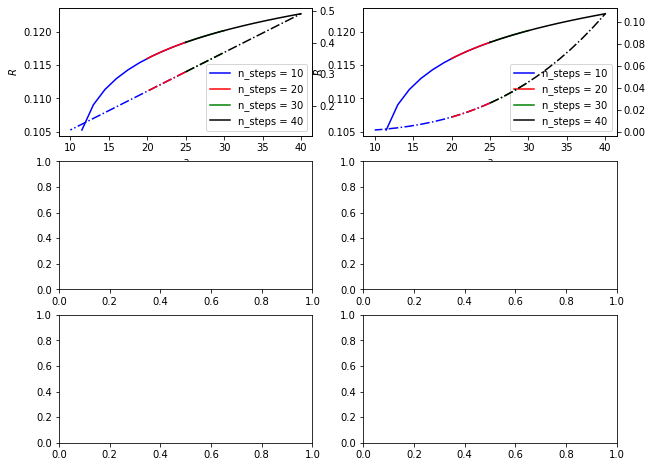

In [42]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(10,8))
ax11 = ax1.twinx()
ax22 = ax2.twinx()
colors = ['blue','red', 'green', 'black', 'magenta' ]
n_step_range = np.arange(1,5)*10
a_max = 25
for n_step, color in zip(n_step_range, colors):
    a_t, G_arr, R_arr, Si_arr, G_general_arr = get_response(a_max,n_step)
    ax1.plot(a_t, R_arr[:], color=color, 
             label='n_steps = %g' % n_step)
    ax1.set_xlabel('$a$'); ax1.set_ylabel(r'$R$')
    ax1.legend()
    ax11.plot(a_t, G_arr[:], '-.', color=color )
    print(a_t)
    ax2.plot(a_t, R_arr[:], color=color, 
             label='n_steps = %g' % n_step)
    ax2.set_xlabel('$a$'); ax2.set_ylabel(r'$R$')
    ax2.legend()
    ax22.plot(a_t, G_general_arr[:], '-.', color=color )